### Read a grayscale image and perform Compare different edge detection algorithms implemented in spatial domain.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Loading the image 

shape of the original image: (269, 221)


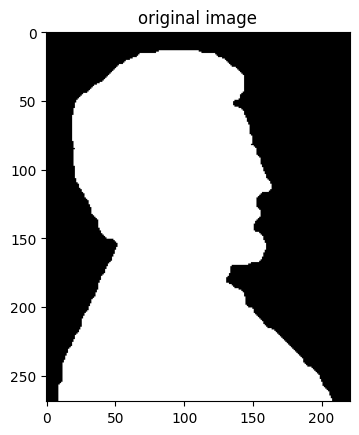

min pixel intensity: 0
max pixel intensity: 255


In [2]:

original_image = cv2.imread("image5/Lincoln.tif", 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

print(f"min pixel intensity: {np.min(original_image)}")
print(f"max pixel intensity: {np.max(original_image)}")

### Function For Edge Detection

In [15]:
def edge_detection(image, kernel_x, kernel_y):
    # get kernel height , width 
    k_height , k_width = kernel_x.shape
    pad = k_height // 2

    # Pad the image with zeros (or you can choose 'reflect', 'edge', etc.)
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values='0')

    Gx = np.zeros_like(image, dtype=np.float64)
    Gy = np.zeros_like(image, dtype=np.float64)

    #convolution 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neibourhood = padded_image[i : i + k_height, j: j+ k_width]
            Gx[i,j] = np.sum(neibourhood * kernel_x)
            Gy[i,j] = np.sum(neibourhood * kernel_y)

    #calculate the gradient magnitude
    G = np.sqrt(Gx **2 + Gy ** 2)

    #Normalize to 0- 255 
    G = (G / np.max(G)) * 255 
    return G.astype(np.uint8)        

    

### Applying Sobel Operator

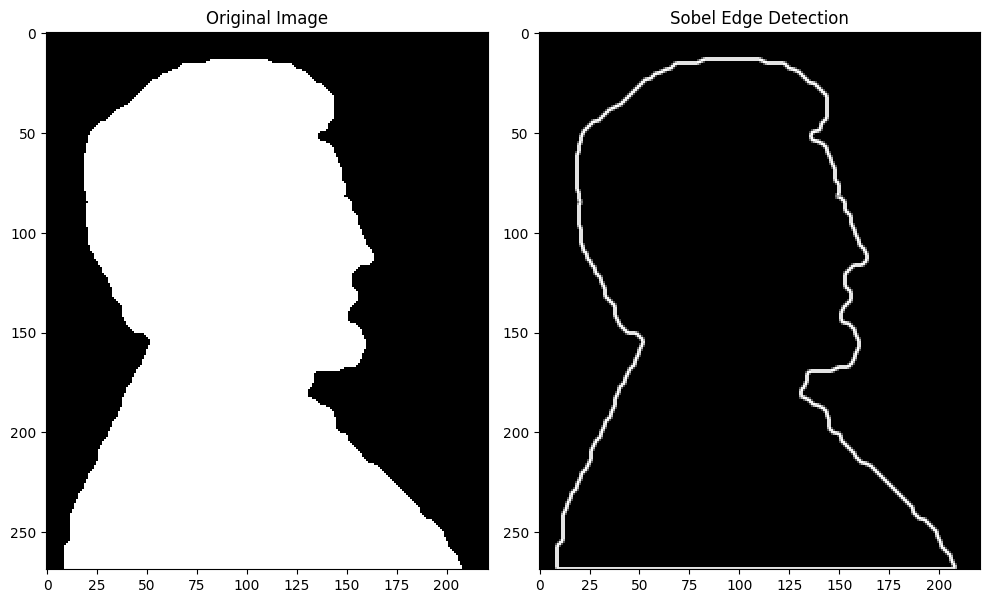

In [17]:
#define Sobel Operator 
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=int)

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype=int)


sobel_edges_image = edge_detection(original_image, sobel_x, sobel_y)

#Plotting
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(sobel_edges_image, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()


### Applying Prewitt Operator


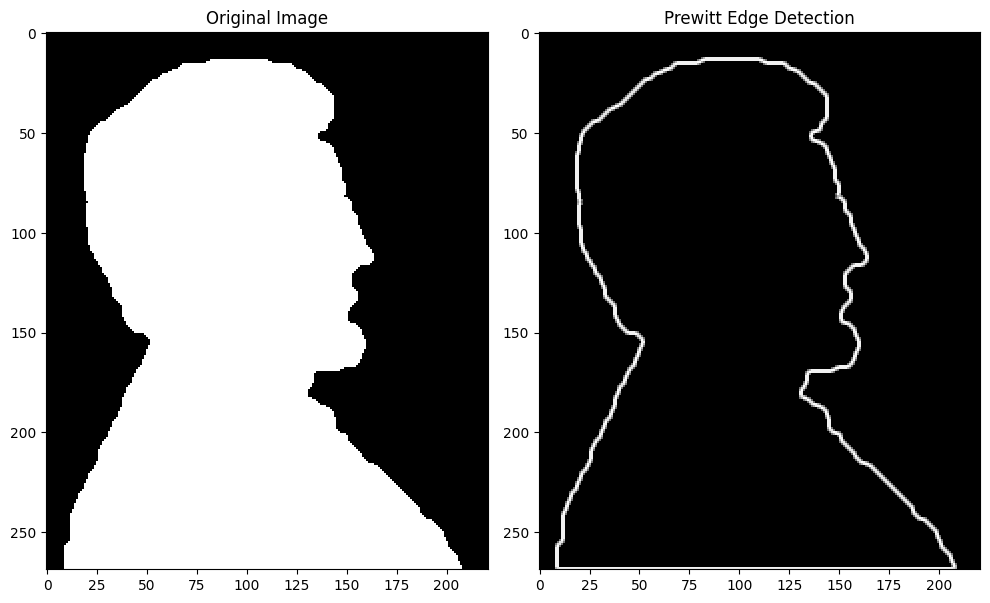

In [18]:
# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]], dtype=int)

prewitt_y = np.array([[-1, -1, -1],
                        [0,  0,  0],
                        [1,  1,  1]], dtype=int)

prewitt_edges_image = edge_detection(original_image, prewitt_x, prewitt_y)


#Plotting
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(prewitt_edges_image, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.tight_layout()
plt.show()


### Apllying Cross operator


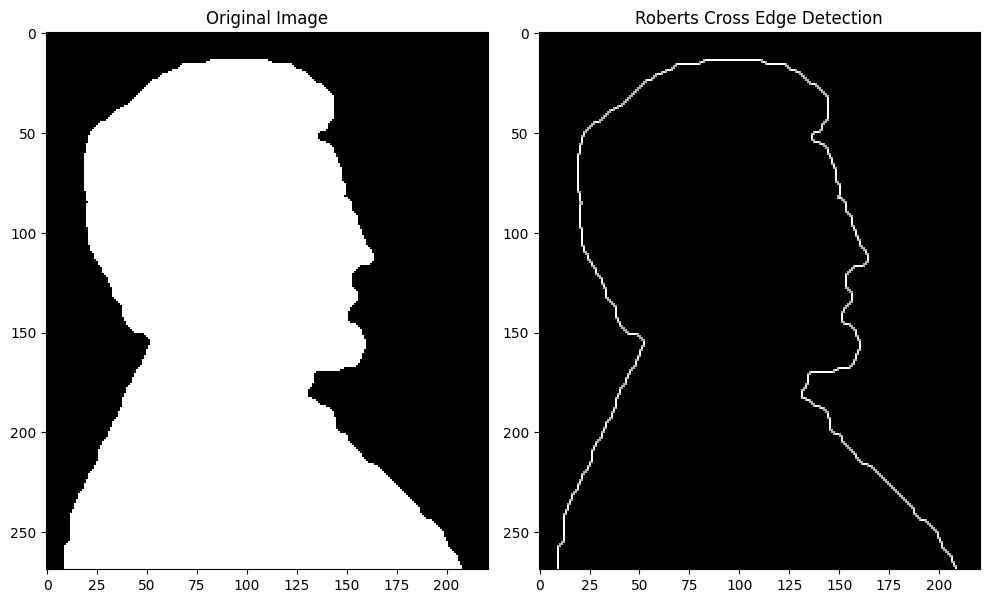

In [19]:
#Define Roberts Cross Kernel
roberts_x = np.array([[1, 0],
                    [0, -1]], dtype=int)

roberts_y = np.array([[0, 1],
                    [-1, 0]], dtype=int)

roberts_edges_image = edge_detection(original_image, roberts_x, roberts_y)


#Plotting
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(roberts_edges_image, cmap='gray')
plt.title('Roberts Cross Edge Detection')

plt.tight_layout()
plt.show()

### Comparing Differents Edge Detection Algorithms


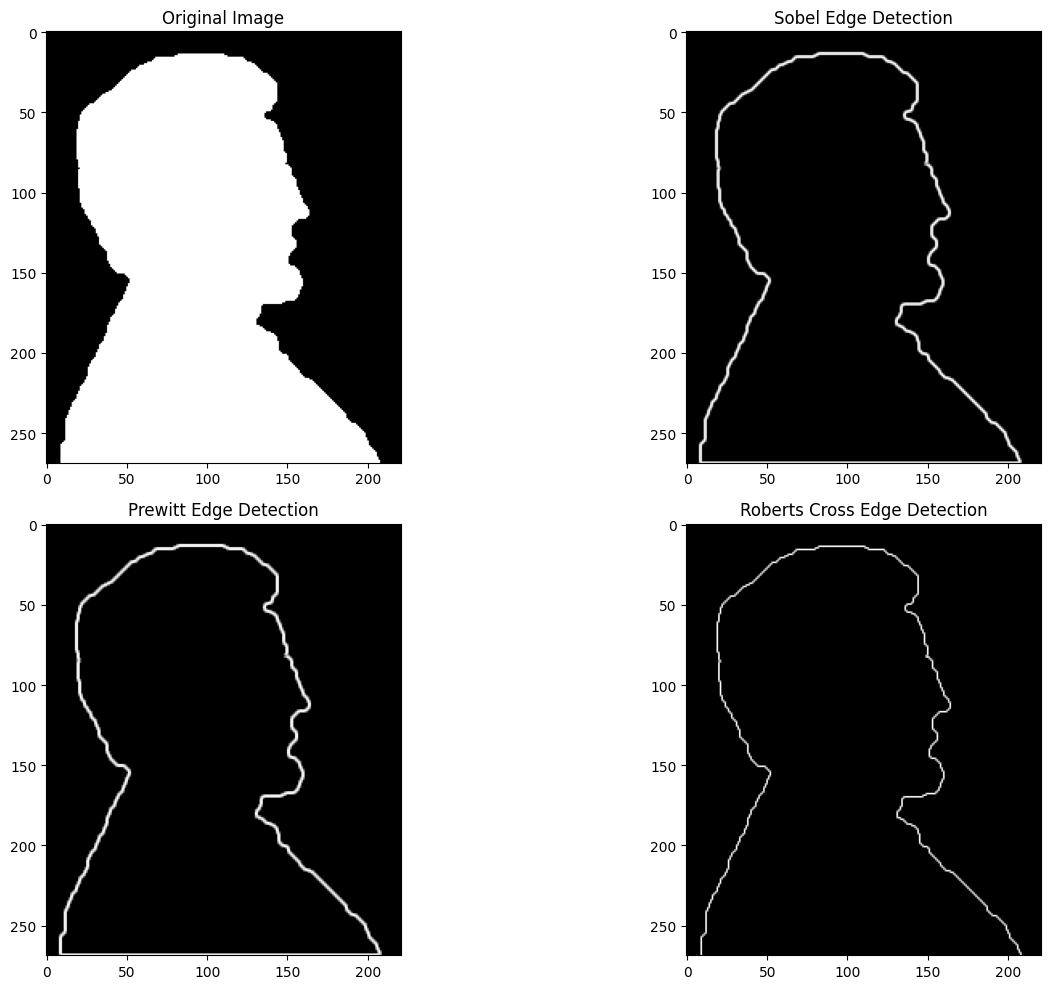

In [20]:
#Plotting
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(2,2,2)
plt.imshow(sobel_edges_image, cmap='gray')
plt.title('Sobel Edge Detection')

plt.subplot(2,2,3)
plt.imshow(prewitt_edges_image, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.subplot(2,2,4)
plt.imshow(roberts_edges_image, cmap='gray')
plt.title('Roberts Cross Edge Detection')

plt.tight_layout()
plt.show()


### (b). Read a grayscale image and perform the the segmentation based on gray level.


shape of the original image: (512, 512)


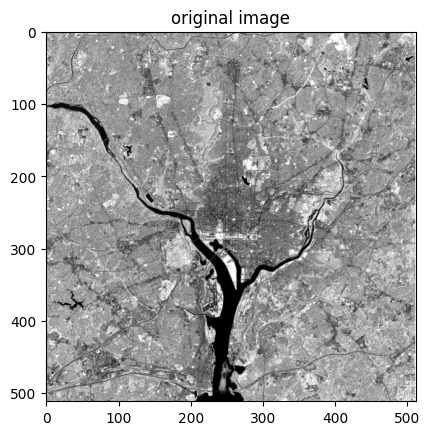

min pixel intensity: 0
max pixel intensity: 254


In [21]:
original_image = cv2.imread("image5/WashingtonDC_Band.tif", 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

print(f"min pixel intensity: {np.min(original_image)}")
print(f"max pixel intensity: {np.max(original_image)}")

### Apply Gray Level Segmentation


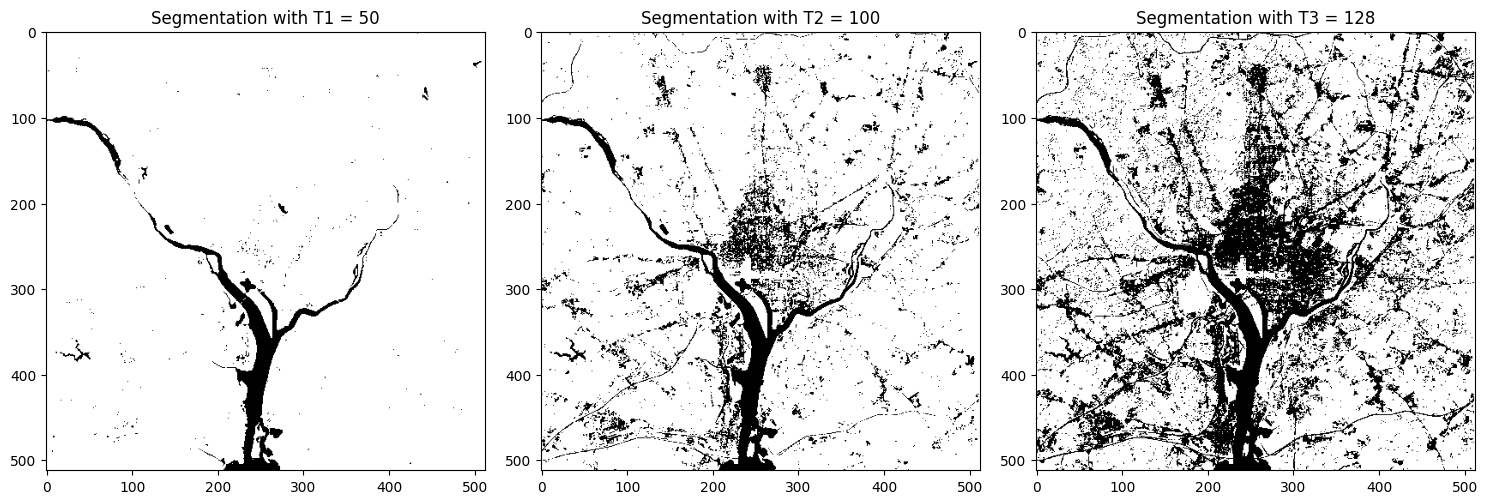

In [22]:
T1 = 50
segmented_image1 = np.where(original_image>T1, 255, 0).astype(np.uint8)

T2 = 100
segmented_image2 = np.where(original_image>T2, 255, 0).astype(np.uint8)

T3 = 128
segmented_image3 = np.where(original_image>T3, 255, 0).astype(np.uint8)

plt.figure(figsize=(15, 5)) 

# Plot segmented_image1
plt.subplot(1, 3, 1)
plt.imshow(segmented_image1, cmap='gray')
plt.title(f'Segmentation with T1 = {T1}')


# Plot segmented_image2
plt.subplot(1, 3, 2)
plt.imshow(segmented_image2, cmap='gray')
plt.title(f'Segmentation with T2 = {T2}')


# Plot segmented_image3
plt.subplot(1, 3, 3)
plt.imshow(segmented_image3, cmap='gray')
plt.title(f'Segmentation with T3 = {T3}')

# Show all plots
plt.tight_layout()
plt.show()

### 
Read a grayscale image and perform the image segmentation using basic global thresholding algorithm

shape of the original image: (958, 798)


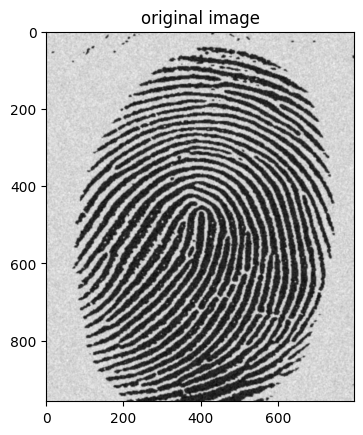

min pixel intensity: 29
max pixel intensity: 224


In [23]:
original_image = cv2.imread("image5/finger_print.tif", 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

print(f"min pixel intensity: {np.min(original_image)}")
print(f"max pixel intensity: {np.max(original_image)}")

### Function for Basic Global Thresholding


In [24]:
def basic_global_thresholding(image, initial_threshold=128, epsilon=0.5):
    T = initial_threshold
    while True:
        #separete pixels
        higher_group = image[image > T]
        lower_group  = image[image <= T]
        
        #avoid division by zero
        if len(higher_group)==0 or len(lower_group)==0:
            break
        
        #calculate means of each group 
        higher_group_mean = np.mean(higher_group)
        lower_group_mean = np.mean(lower_group)
        
        #update threshold
        T_new = (higher_group_mean + lower_group_mean)/2
        
        #check for covergence
        if abs(T_new - T) < epsilon:
            break
        T = T_new
        
    #Apply the final threshold
    binary_image = np.where(image > T, 255, 0).astype(np.uint8)
    return binary_image, T

#### Apply the Thresholding


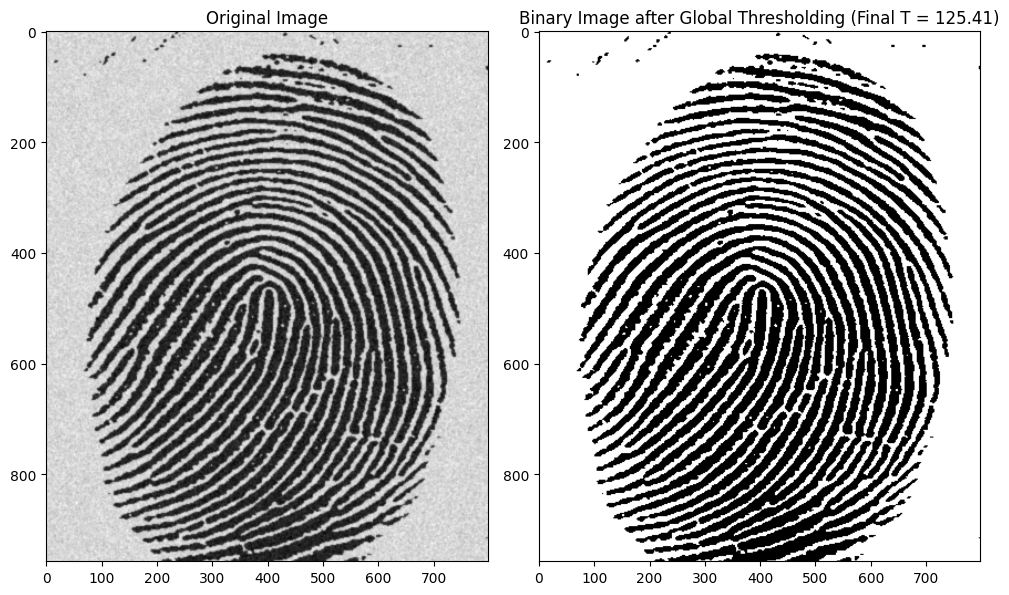

In [25]:
binary_image, final_threshold = basic_global_thresholding(original_image)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image after Global Thresholding (Final T = {final_threshold:.2f})')

plt.tight_layout()
plt.show()